# **SC Assignment II**
**Iris Flower Dataset Classifier** using Sequential Model API to
classify Iris plants into two species Setosa and Versicolor using Iris dataset

*Author* :  **Anna Emmanuel  CS5A 13** 

In [1]:
# importing packages
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import datetime

In [2]:
import seaborn as sns

In [3]:
#loading IRIS dataset
iris = sns.load_dataset("iris") 
iris.head(60)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Dropping data relating to virginica species
iris = iris[iris['species']!='virginica']
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


> We need to convert categorical value i.e. setosa and versicolor into numerical (0 and 1), here we are adding a new column "Class" into the DataFrame for the numerical values.





In [5]:
data=pd.DataFrame(iris)
labels=[]
for i in range(len(data)):
  if data['species'][i] =='setosa':      # 0 represents setosa 
    labels.append(0)
  else:
    labels.append(1)                     # 1 represents versicolor
data['Class']=labels
data

,sepal_length,sepal_width,petal_length,petal_width,species,Class
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
97,6.2,2.9,4.3,1.3,versicolor,1
98,5.1,2.5,3.0,1.1,versicolor,1


**Separating Input and target Variables** 

In [6]:
X = data.drop('species', axis=1)
X= X.drop('Class',axis=1)
Y = data['Class'] 

**Splitting into Train and Test sets**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Defining and Building the model** 

In [8]:
#Defining the model
model = Sequential()

#Building the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import RMSprop
#Compiling the model
optimizer = RMSprop(0.01)  #learning rate = 0.01
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

**Training the model** 

In [11]:
history=model.fit(X_train, Y_train,validation_split=0.2,epochs=200, batch_size=10, verbose = 1) 

Epoch 1/200
7/7 [==============================] - 0s 25ms/step - loss: 0.6112 - accuracy: 0.7031 - val_loss: 0.4828 - val_accuracy: 1.0000
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.8750 - val_loss: 0.3404 - val_accuracy: 0.6875
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1613 - accuracy: 0.9219 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/200
7/7 [=========

**Model Evaluation** 

In [12]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 1.0878e-12 - accuracy: 1.0000


[1.087831213997248e-12, 1.0]

**Model Accuracy** 

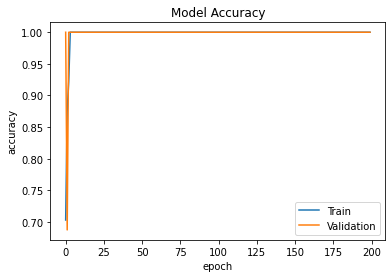

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Model Loss**


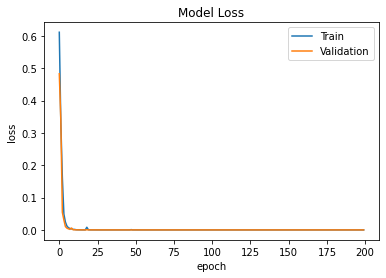

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Prediction** 

> Since we have used one output neuron while defining the model and loss as binary_crossentropy while compiling the model, we will get single probability value.

> As our predictions are single probability value. We can use a threshold value to get the actual labels. Here we have taken a threshold of 0.5.


In [15]:
pred=model.predict(X_test)

In [16]:
prediction = []
for value in pred:
  if value <= 0.5:            # threshold of 0.5
    prediction.append(0)      # 0 implies 'setosa'
  else:
    prediction.append(1)      # 1 implies 'versicolor'

In [17]:
Y_pred=[]
for x in prediction:
  if x==0:
    Y_pred.append('setosa')
  else:
    Y_pred.append('versicolor')

**Prediction Results** 

In [18]:
result=pd.DataFrame(X_test)
result['target_species']=Y_pred
result

,sepal_length,sepal_width,petal_length,petal_width,target_species
83,6.0,2.7,5.1,1.6,versicolor
53,5.5,2.3,4.0,1.3,versicolor
70,5.9,3.2,4.8,1.8,versicolor
45,4.8,3.0,1.4,0.3,setosa
44,5.1,3.8,1.9,0.4,setosa
39,5.1,3.4,1.5,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
10,5.4,3.7,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa


In [19]:
Y_test=['setosa' if x==0 else 'versicolor' for x in Y_test] #Converting back to categorical values
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)

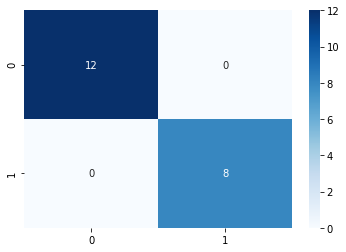

In [20]:
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

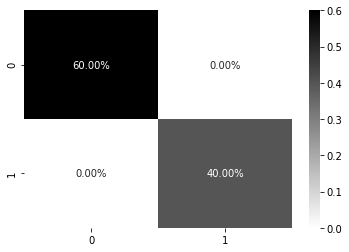

In [21]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap='binary')